In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Produit matriciel

In [16]:
Psi0 = np.array([1,0])
H = 1/np.sqrt(2)*np.array([[1,1], [1,-1]])


print(H @ Psi0)  #réalise le produit de matrice
print(np.dot(H,Psi0))   #np.dot = produit de matrice

[0.70710678 0.70710678]
[0.70710678 0.70710678]


# Produit tensoriel

In [18]:
sigma_x = np.array([[0,1], [1,0]])
I = np.array([[1,0], [0,1]])

C = np.kron(I,sigma_x)+np.kron(sigma_x,I) #Produit tensoriel
D = np.kron(sigma_x,sigma_x)
print(C)
print('********************')
print(D)

[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]
********************
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


# Vecteurs propres et valeurs propres

In [19]:
sigma_z = np.array([[1,0], [0,-1]])

vals, vecs = np.linalg.eig(sigma_z) #calcul des valeurs propres et vecteurs propres
print('Valeurs propres de sigma_z : ',vals)
print('Vecteurs propres de sigma_z : \n',vecs[0],vecs[1])

print('********************')

vals, vecs = np.linalg.eig(sigma_x)
print('Valeurs propres de sigma_x : ',vals)
print('Vecteurs propres de sigma_x : \n',vecs[0],vecs[1])

Valeurs propres de sigma_z :  [ 1. -1.]
Vecteurs propres de sigma_z : 
 [1. 0.] [0. 1.]
********************
Valeurs propres de sigma_x :  [ 1. -1.]
Vecteurs propres de sigma_x : 
 [ 0.70710678 -0.70710678] [0.70710678 0.70710678]


# Sphère de Bloch avec QuTIP

In [7]:
import qutip as qt

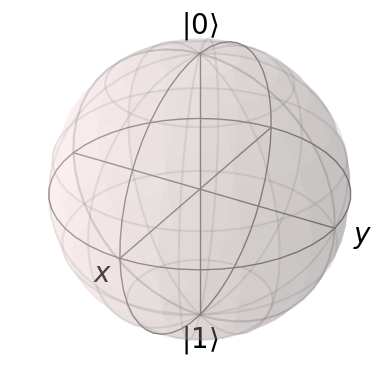

In [22]:
fig= plt.figure()
axes = fig.add_subplot(projection='3d')
b = qt.Bloch(fig=fig,axes=axes)
b.make_sphere()

# Oscillations de Rabi et représentation sur la sphère de Bloch

In [23]:
# Fonction de qutip
qt.mesolve

<function qutip.solver.mesolve.mesolve(H, rho0, tlist, c_ops=None, e_ops=None, args=None, options=None, **kwargs)>

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


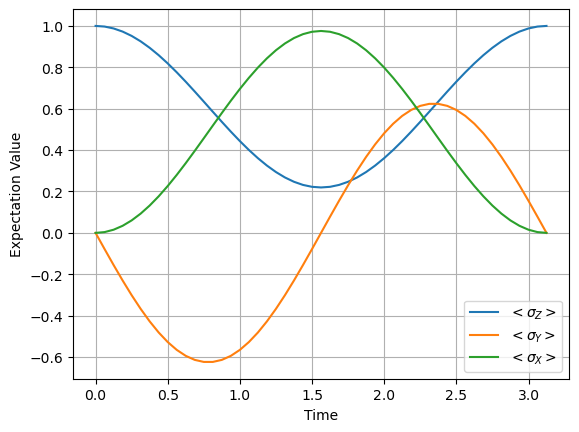

In [10]:
delta = 2*np.pi*0.25
Omega = 2*np.pi*0.2
Omega_eff = np.sqrt(Omega**2+delta**2)
times = np.linspace(0.0,2*np.pi/Omega_eff,51)

# Hamiltonien défini à partir des matrices de Pauli (de la librairie qutip)
H = 0.5*Omega*qt.sigmax() + 0.5*delta*qt.sigmaz()

# Etat initial défini avec la librairie qutip
psi0 = qt.basis(2,0)
print(psi0)

# Résolution avec qutip 
result = qt.mesolve(H, psi0, times, [], [qt.sigmaz(),qt.sigmay(),qt.sigmax()])

fig, ax = plt.subplots()
ax.plot(result.times,result.expect[0],label=r'$<\sigma_Z>$')
ax.plot(result.times,result.expect[1],label=r'$<\sigma_Y>$')
ax.plot(result.times,result.expect[2],label=r'$<\sigma_X>$')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation Value')
ax.legend()
ax.grid()

ValueError: 'c' argument has 4 elements, which is inconsistent with 'x' and 'y' with size 41.

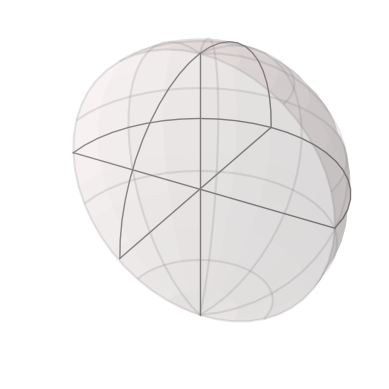

In [11]:
fig= plt.figure()
axes = fig.add_subplot(projection='3d')
b = qt.Bloch(fig=fig,axes=axes)
b.make_sphere()

b.vector_color = ['k','b','r','g']
b.point_color = ['r','b','g','k']

# Ajoute un vecteur représentant l'axe de rotation
vec = np.array([Omega,0,delta])/Omega_eff
b.add_vectors(vec)

# Ajoute un vecteur représentant l'état initial
up = qt.basis(2, 0)
b.add_states(up)

n = 40
b.add_points(np.array([result.expect[2][:n+1],result.expect[1][:n+1],result.expect[0][:n+1]]))

b.make_sphere()

# Interrogation de Ramsey et déphasage

In [ ]:
import scipy.linalg as LA

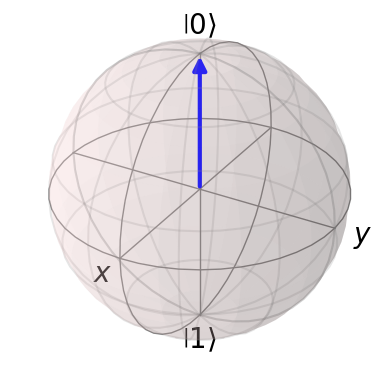

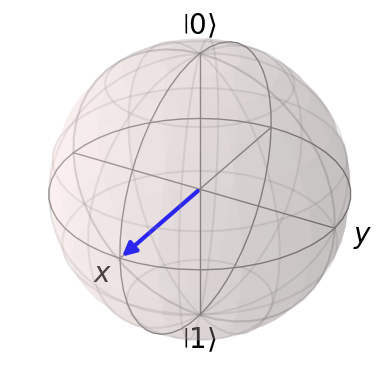

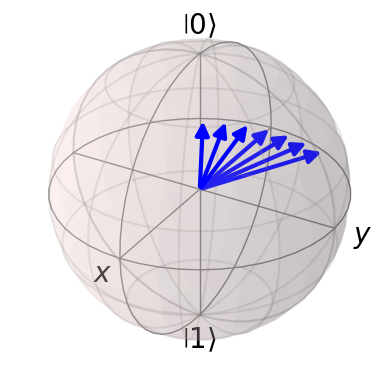

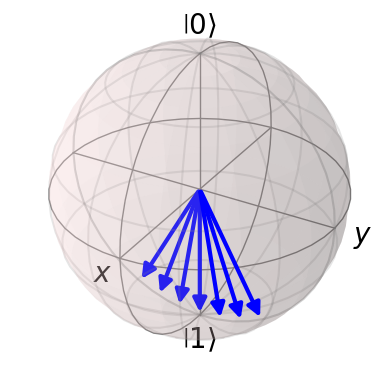

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
a = qt.Bloch(fig=fig,axes=axes)

fig_1 = plt.figure()
axes_1 = fig_1.add_subplot(projection='3d')
b = qt.Bloch(fig=fig_1,axes=axes_1)

fig_2 = plt.figure()
axes_2 = fig_2.add_subplot(projection='3d')
c = qt.Bloch(fig=fig_2,axes=axes_2)
c.vector_color=['b']

fig_3 = plt.figure()
axes_3 = fig_3.add_subplot(projection='3d')
d = qt.Bloch(fig=fig_3,axes=axes_3)
d.vector_color=['b']

# Crée l'état initial
psi0 = np.array([1,0])
# Porte Hadamard = Pulse pi/2
H = 1/np.sqrt(2)*np.array([[1,1], [1,-1]])
# Défintion des opérateurs de Pauli
sigma_x = np.array([[0,1], [1,0]])
sigma_y = np.array([[0,-1j], [1j,0]])
sigma_z = np.array([[1,0], [0,-1]])

  
# Calcule le vecteur de Bloch
def vec_bloch(psi):
    expect_x = np.conj(psi.T) @ sigma_x @ psi
    expect_y = np.conj(psi.T) @ sigma_y @ psi
    expect_z = np.conj(psi.T) @ sigma_z @ psi
    vec = np.array(np.real([expect_x,expect_y,expect_z])) #expect_y = 0j -> nécessaire de prendre la partie réelle pour le plot
    return vec

# Choisi la couleur du vecteur sur la sphère de Bloch
a.vector_color=['b']

# Ajoute un vecteur représentant l'état initial
a.add_vectors(vec_bloch(psi0))
# Crée la sphère
a.make_sphere()

# Après le pulse Pi/2
psi1 = H@psi0
b.add_vectors(vec_bloch(psi1))
b.vector_color=['b']
b.make_sphere()

# Evolution libre
# delta est le désaccord
delta = [2*np.pi]+np.linspace(-1,1,7)
# Durée pour une rotation de pi sur l'équateur
t = np.pi/np.mean(delta)

# Calcul pour différent désaccords
for d_delta in delta:
    
    dephasage = LA.expm(-1j*0.5*d_delta*sigma_z*t)
    psi2 =  dephasage @ psi1

    psi3 =  H @ dephasage @ psi1

    c.add_vectors(vec_bloch(psi2))
    d.add_vectors(vec_bloch(psi3))


c.make_sphere()
fig_2.savefig("Bloch_Sphere_2_dephasage.png", transparent=True)
d.make_sphere()
fig_3.savefig("Bloch_Sphere_3_dephasage.png", transparent=True)


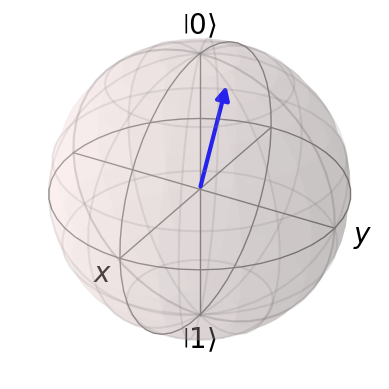

In [ ]:
def Psi(theta,phi):
    return np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)],dtype=complex)

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
a = qt.Bloch(fig=fig,axes=axes)
a.vector_color=['b']
a.add_vectors(vec_bloch(Psi(np.pi/9,np.pi/3)))
a.make_sphere()
fig.savefig("Bloch_Sphere_vector.png", transparent=True)


# Etat pur et mélange statistique

## Interprétation d'ensemble

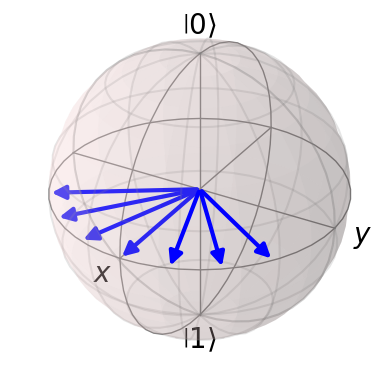

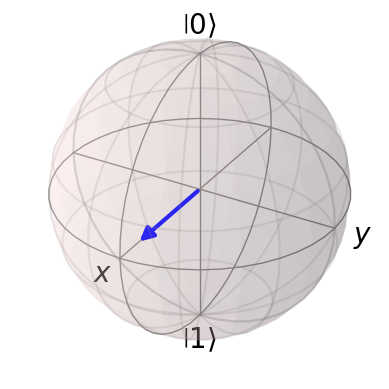

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
a = qt.Bloch(fig=fig,axes=axes)

fig_1 = plt.figure()
axes_1 = fig_1.add_subplot(projection='3d')
b = qt.Bloch(fig=fig_1,axes=axes_1)

# Calcul pour une distribution équiprobable de désaccords
delta = [2*np.pi]+np.linspace(-1,1,7)
d = len(delta)
vec_tot = np.zeros(3)
for d_delta in delta:
    
    dephasage = LA.expm(-1j*0.5*d_delta*sigma_z*2*np.pi/np.mean(delta)) # Calcul pour une rotation de 2pi
    psi =  dephasage @ psi1
    
    vec_tot += vec_bloch(psi)/d
    
    a.add_vectors(vec_bloch(psi))

b.add_vectors(vec_tot)


a.vector_color=['b']
a.make_sphere()
fig.savefig("Bloch_Sphere_dephasage_.png", transparent=True)
b.vector_color=['b']
b.make_sphere()
fig_1.savefig("Bloch_Sphere_dephasage_sum.png", transparent=True)


## Matrice densité

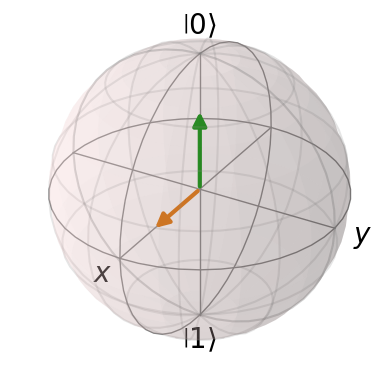

In [ ]:
p = 0.8
rho_mixed = np.array([[p,0],[0,1-p]])

# Evolution de la matrice densité 
def evol_rho(rho, U):
    return U @ rho @ np.conj(U.T)

# Calcule le vecteur de Bloch à partir de la matrice densité
def vec_bloch_density(rho):
    expect_x = np.trace(sigma_x @ rho)
    expect_y = np.trace(sigma_y @ rho)
    expect_z = np.trace(sigma_z @ rho)
    vec = np.array(np.real([expect_x,expect_y,expect_z])) #expect_y = 0j -> nécessaire de prendre la partie réelle pour le plot
    return vec

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
a = qt.Bloch(fig=fig,axes=axes)
#a.vector_color=['b']
a.add_vectors(vec_bloch_density(rho_mixed))
a.add_vectors(vec_bloch_density(evol_rho(rho_mixed,H)))
a.make_sphere()
fig.savefig("Bloch_Sphere_rho.png", transparent=True)


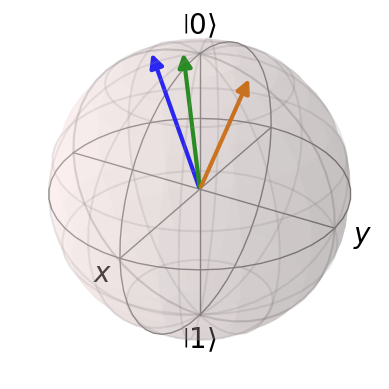

In [ ]:
p = 0.8
psi1 = H @ np.array([1,0])
psi2 = LA.expm(-1j*0.51*sigma_z*2*np.pi)@psi1
psi3 = H @ psi2
psi4 = H @ LA.expm(-1j*0.47*sigma_z*2*np.pi)@psi1
psi5 = H @ LA.expm(-1j*0.53*sigma_z*2*np.pi)@psi1
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
a = qt.Bloch(fig=fig,axes=axes)
a.add_vectors(vec_bloch(psi3))
a.add_vectors(vec_bloch(psi4))
a.add_vectors(vec_bloch(psi5))
a.make_sphere()
fig.savefig("Bloch_Sphere_err.png", transparent=True)
